In [2]:
import pandas as pd
a=pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')
print(a)

      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0             1    15598695      Fields          619    France  Female   42   
1             2    15649354    Johnston          608     Spain  Female   41   
2             3    15737556    Vasilyev          502    France  Female   42   
3             4    15671610      Hooper          699    France  Female   39   
4             5    15625092     Colombo          850     Spain  Female   43   
...         ...         ...         ...          ...       ...     ...  ...   
9995       9996    15583480      Morgan          771    France    Male   39   
9996       9997    15620341     Nwebube          516    France    Male   35   
9997       9998    15613886    Trevisan          709    France  Female   36   
9998       9999    15792916  Ositadimma          772   Germany    Male   42   
9999      10000    15710408  Cunningham          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [8]:
from scipy.stats import skew, kurtosis
numerical_cols = ['Balance', 'CreditScore', 'EstimatedSalary']
summary_stats = {}
for col in numerical_cols:
    summary_stats[col] = {
        'Mean': a[col].mean(),
        'Median': a[col].median(),
        'Standard Deviation': a[col].std(),
        'Skewness': skew(a[col], nan_policy='omit'),
        'Kurtosis': kurtosis(a[col], nan_policy='omit')
    }
summary_df = pd.DataFrame(summary_stats)
print(summary_df)

                         Balance  CreditScore  EstimatedSalary
Mean                76485.889288   650.528800    100090.239881
Median              97198.540000   652.000000    100193.915000
Standard Deviation  62397.405202    96.653299     57510.492818
Skewness               -0.141088    -0.071596         0.002085
Kurtosis               -1.489267    -0.426113        -1.181528


<ipython-input-11-cbc611f6033c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
<ipython-input-11-cbc611f6033c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geography_counts.index, y=geography_counts.values, palette='coolwarm')


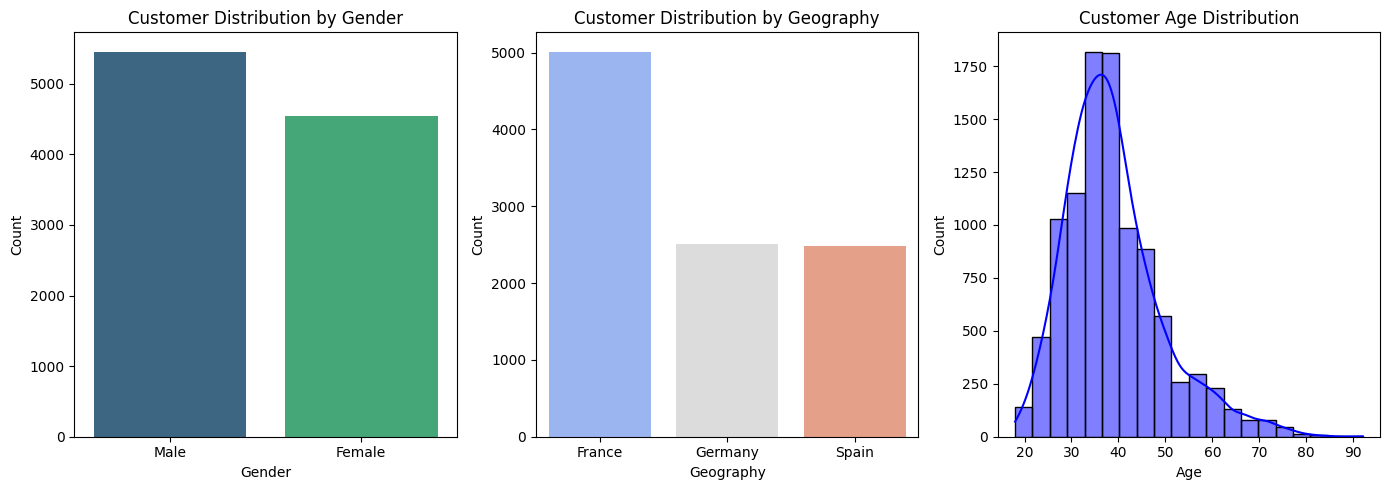

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
gender_counts = a['Gender'].value_counts()
geography_counts = a['Geography'].value_counts()
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title("Customer Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.subplot(1, 3, 2)
sns.barplot(x=geography_counts.index, y=geography_counts.values, palette='coolwarm')
plt.title("Customer Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.subplot(1, 3, 3)
sns.histplot(a['Age'], bins=20, kde=True, color='blue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [13]:
df = pd.DataFrame(a)
transaction_stats = df.groupby('IsActiveMember')['EstimatedSalary'].agg(
    min='min',
    max='max',
    mean='mean'
).reset_index()
print(transaction_stats)

   IsActiveMember    min        max           mean
0               0  91.75  199992.48  100767.203854
1               1  11.58  199953.33   99452.965894


Correlation Matrix:
                 CreditScore   Balance  EstimatedSalary
CreditScore         1.000000  0.006268        -0.001384
Balance             0.006268  1.000000         0.012797
EstimatedSalary    -0.001384  0.012797         1.000000


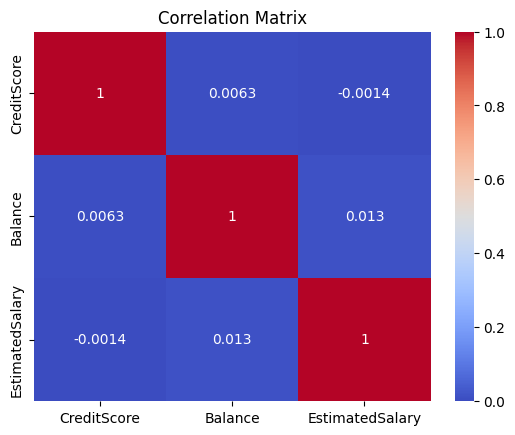

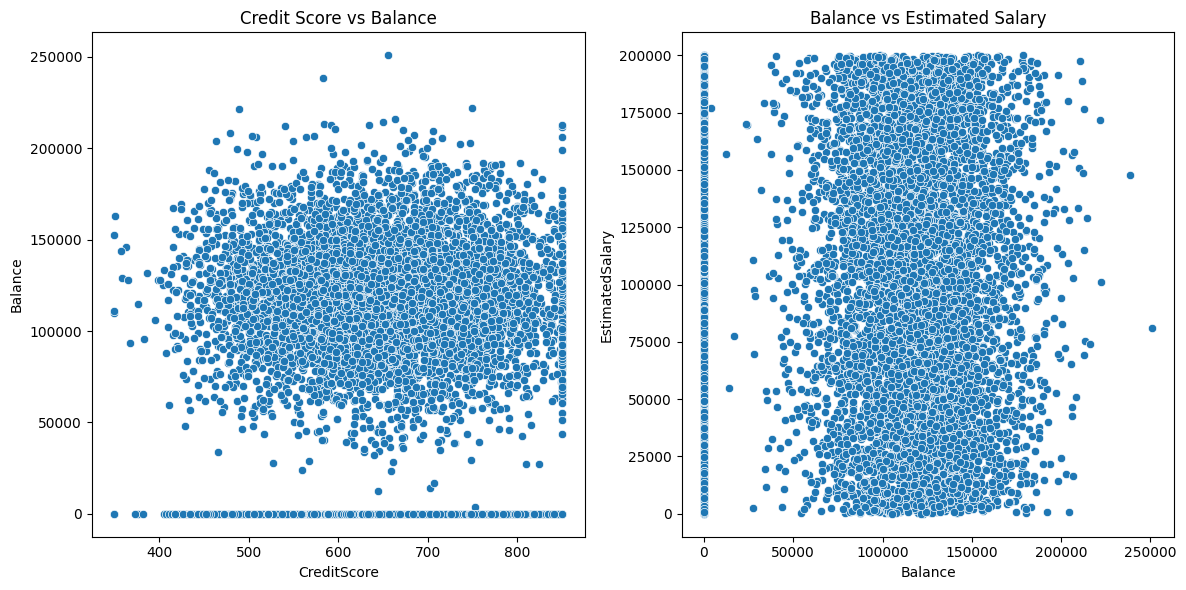

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'a' is your DataFrame
# Calculate correlation between variables
correlation_matrix = a[['CreditScore', 'Balance', 'EstimatedSalary']].corr()

# Print the correlation matrix in tabular form
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(12, 6))

# Credit Score vs Balance
plt.subplot(1, 2, 1)
sns.scatterplot(x='CreditScore', y='Balance', data=a)
plt.title('Credit Score vs Balance')

# Balance vs Estimated Salary
plt.subplot(1, 2, 2)
sns.scatterplot(x='Balance', y='EstimatedSalary', data=a)
plt.title('Balance vs Estimated Salary')

plt.tight_layout()
plt.show()



In [19]:
df = pd.DataFrame(a)
churn_stats = df.groupby('HasCrCard')[['Balance', 'CreditScore', 'EstimatedSalary']].agg(['min', 'max', 'mean']).reset_index()

print(churn_stats)

  HasCrCard Balance                          CreditScore                   \
                min        max          mean         min  max        mean   
0         0     0.0  250898.09  77920.787552         350  850  651.345331   
1         1     0.0  221532.80  75886.913330         350  850  650.187952   

  EstimatedSalary                            
              min        max           mean  
0           90.07  199992.48  100974.397711  
1           11.58  199970.74   99721.161949  


In [20]:
df = pd.DataFrame(a)
low_credit_score = df['CreditScore'] < 700
high_balance = df['Balance'] > 2500

both_condition = low_credit_score & high_balance
probability = both_condition.mean()

print(f"Probability that a customer has both a low credit score and a high balance: {probability:.2f}")

Probability that a customer has both a low credit score and a high balance: 0.44
